<a href="https://colab.research.google.com/github/damilare-akin/song-popularity-prediction/blob/main/popularity_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify Popularity
## Introduction
I set out to practise concepts I learned in statistical learning, particularly regression(with decision trees and random forest) and exploratory data analysis. The goal is to **develop a model that predicts the popularity (measured on a scale of 1 to 100) of a track on spotify**.  Along the way I'll ask myself some questions:
 
1. How far back do the tracks in the dataset go?
2. What are the most popular songs in the entire dataset (and when were they released)?
3. What is the relationship between the other features and the target variable (popularity)?
 
Note:  The dataset used in this project was obtained from [Kaggle](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks). It consists of 170,653 tracks dating from 1921 to 2020.

In [ ]:
# Setting up
%matplotlib inline
 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
 
import matplotlib.pyplot as plt
import seaborn as sns
 
print('Imports successful')

Imports successful


In [ ]:
# Comment out this cell. It uses a copy of the dataset in my Google Drive
file_path = 'drive/MyDrive/datasets/spotify_tracks.csv'
df = pd.read_csv(file_path)

In [ ]:
# Uncomment this cell to use the copy of the dataset in the root directory
# df = pd.read_csv('spotify_tracks.csv')

In [ ]:
df.shape

(170653, 19)

In [ ]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17


-----------------
## Questions I want answered from the data

### How far back do the tracks go?

In [ ]:
oldest_year = df['release_date'].min()
print(f'The oldest year in this dataset is {oldest_year}.')

The oldest year in this dataset is 1921.


### What are the most popular tracks in the entire dataset when it was sourced (and when were they released)?

In [ ]:
most_popular = df[['artists','year','name', 'release_date', 'popularity']]
most_popular = most_popular.sort_values(by=['popularity', 'name'], ascending=[False, True])
most_popular.artists = most_popular.artists.str.strip('[]').str.replace("'", "")
most_popular.head(10)

,artists,year,name,release_date,popularity
19611,"Bad Bunny, Jhay Cortez",2020,Dakiti,2020-10-30,100
19606,"24kGoldn, iann dior",2020,Mood (feat. iann dior),2020-07-24,99
19618,BTS,2020,Dynamite,2020-08-28,97
19616,The Weeknd,2020,Blinding Lights,2020-03-20,96
19608,"Cardi B, Megan Thee Stallion",2020,WAP (feat. Megan Thee Stallion),2020-08-07,96
19612,Pop Smoke,2020,What You Know Bout Love,2020-07-03,96
19610,Ariana Grande,2020,positions,2020-10-30,96
19607,"Pop Smoke, Lil Baby, DaBaby",2020,For The Night (feat. Lil Baby & DaBaby),2020-07-03,95
19615,"Justin Bieber, Chance the Rapper",2020,Holy (feat. Chance The Rapper),2020-09-18,95
19620,"Justin Bieber, benny blanco",2020,Lonely (with benny blanco),2020-10-16,95


In [ ]:
# Remove non-numeric columns, that I may begin numerical analysis:
df.drop(['artists', 'id', 'name', 'release_date'], axis=1, inplace=True)
print(df.shape)
df.head(2)

(170653, 15)


,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,1921,0.982,0.279,831667,0.211,0,0.878,10,0.665,-20.096,1,4,0.0366,80.954
1,0.9630,1921,0.732,0.819,180533,0.341,0,0.000,7,0.160,-12.441,1,5,0.4150,60.936


### What is the correlation between the other features and the target variable (popularity)?

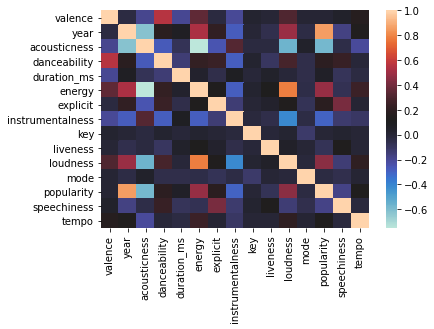

In [ ]:
sns.heatmap(df.corr(), cmap='icefire');

In [ ]:
df.corr()['popularity'].sort_values(ascending=False)

popularity          1.000000
year                0.862442
energy              0.485005
loudness            0.457051
danceability        0.199606
explicit            0.191543
tempo               0.133310
duration_ms         0.059597
valence             0.014200
key                 0.007826
mode               -0.028897
liveness           -0.076464
speechiness        -0.171979
instrumentalness   -0.296750
acousticness       -0.573162
Name: popularity, dtype: float64

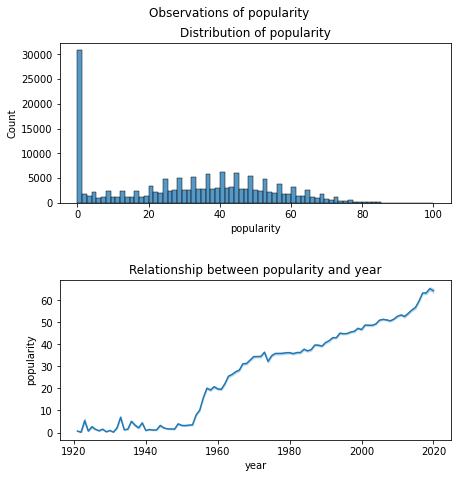

In [ ]:
# Set the target variable
y = df.popularity
 
fig,axs = plt.subplots(2,1, figsize=(7,7))
fig.suptitle('Observations of popularity')
 
# Observe the distribution of 'popularity'axs[0].set_title('Distribution of popularity')
axs[0].set_title('Distribution of popularity')
sns.histplot(x='popularity', data=df, ax=axs[0])
 
axs[1].set_title('Relationship between popularity and year')
sns.lineplot(x='year', y='popularity', data=df, ax=axs[1])
 
fig.tight_layout(pad=3.0)

Note: The Spotify API documentation states  that [popularity is calculated with respect to the current year](https://developer.spotify.com/documentation/web-api/reference/#objects-index). Hence, the rise in popularity as the years go by does not mean tracks were not popular in their time; they just are not as  popular **now**.  
> The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.

In [ ]:
# Set the predictor variables
features = ['valence', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'explicit', 'year', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo']

X = df[features]
X.head()

,valence,acousticness,danceability,duration_ms,energy,explicit,year,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
0,0.0594,0.982,0.279,831667,0.211,0,1921,0.878000,10,0.665,-20.096,1,0.0366,80.954
1,0.9630,0.732,0.819,180533,0.341,0,1921,0.000000,7,0.160,-12.441,1,0.4150,60.936
2,0.0394,0.961,0.328,500062,0.166,0,1921,0.913000,3,0.101,-14.850,1,0.0339,110.339
3,0.1650,0.967,0.275,210000,0.309,0,1921,0.000028,5,0.381,-9.316,1,0.0354,100.109
4,0.2530,0.957,0.418,166693,0.193,0,1921,0.000002,3,0.229,-10.096,1,0.0380,101.665


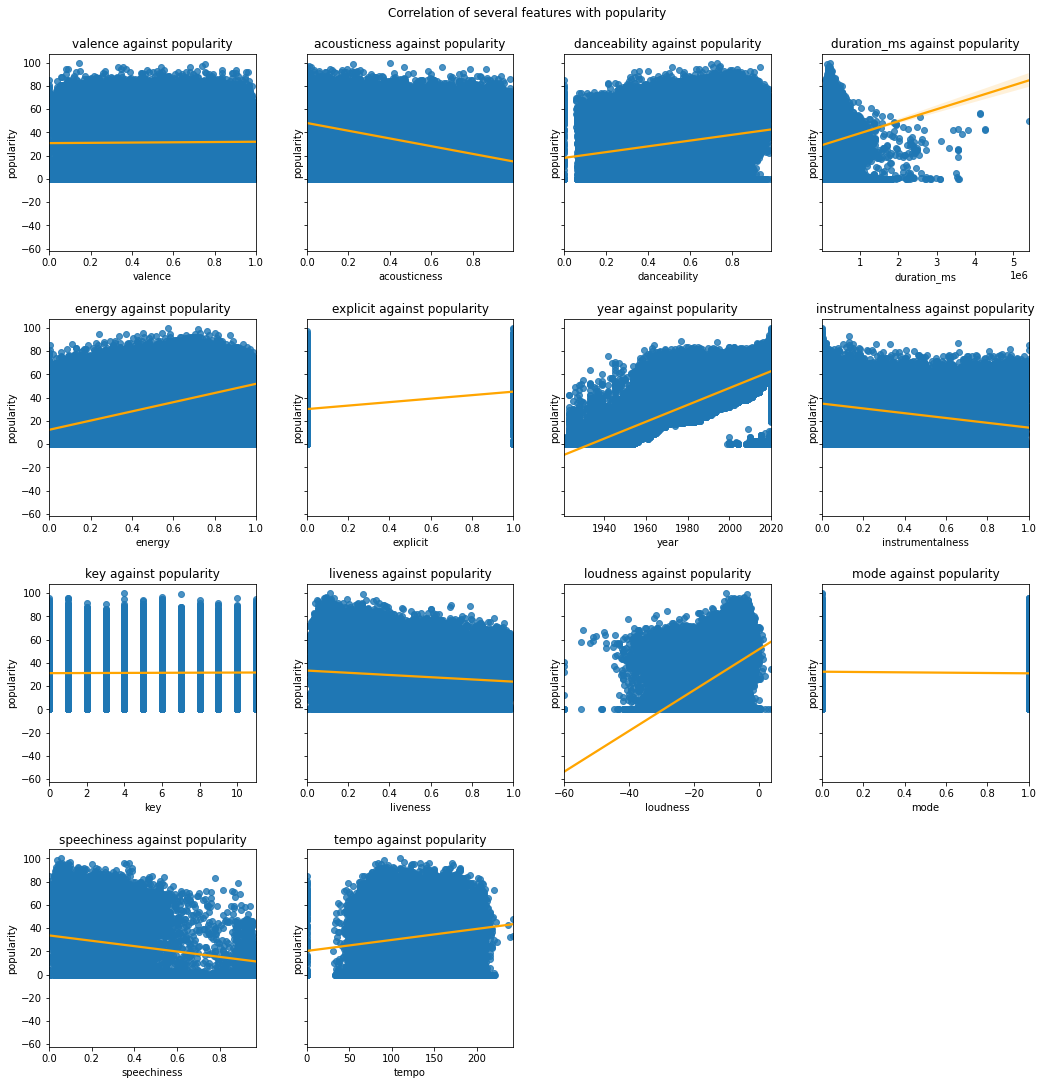

In [ ]:
#create a 4 by 4 grid of subplots
fig, axs = plt.subplots(4, 4, sharey=True, figsize=(15,15))
fig.suptitle('Correlation of several features with popularity', y=1.01)
 
#I only need 14 subplots (there are 14 features), might as well remove the last three subplots
fig.delaxes(axs[3][2])
fig.delaxes(axs[3][3])
 
#I need to be able to loop through each subplot, so I make a 1-d array I can loop through easily. 
#I also exclude the deleted axes
loopable_axs = axs.reshape(-1)[:-2]
 
for n in range(len(loopable_axs)):
  loopable_axs[n].set_title(f'{features[n]} against popularity')
  sns.regplot(ax=loopable_axs[n], x=features[n], y='popularity', data=df, line_kws={'color':'orange'})
 
fig.tight_layout(pad=2.0)


------
## Predicting Popularity

### What features are the most important to our model?

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size= 0.1, random_state=0)

 The next two code cells are simply to perform one task: visualize feature importances when predicting song popularity. To do this, I use the `yellowbrick`  library. The first cell simply updates the library so I can use the `FeatureImportances` module.

In [ ]:
 
# Update the yellowbrick module
!pip install yellowbrick --upgrade

     |████████████████████████████████| 276kB 5.3MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


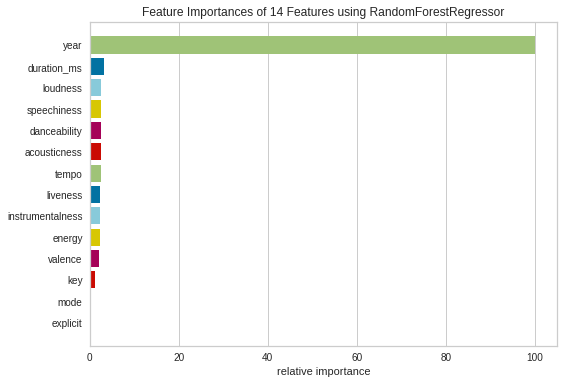

In [ ]:
# Import the Yellowbrick Feature Importance visualizer
from yellowbrick.model_selection import FeatureImportances
model = RandomForestRegressor()
viz = FeatureImportances(model)
viz.fit(train_X, train_y)
viz.show()

 The plot above shows that the features `mode`and `explicit` are not really important to the model. However, because they contribute (a little) to the reduction of the Mean Absolute Error of my models, I will not drop them.

### Approach 1: Using Decision Trees

In [ ]:
dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(train_X, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
val_preds1 = dec_tree.predict(test_X)
val_mae1 = mean_absolute_error(test_y, val_preds1)
print(f'Mean absolute error of this model: {val_mae1:.3f}')
 
# print(f'Training Coefficient of R^2 : {dec_tree.score(train_X, train_y):.2f}')
# print(f'Test Coefficient of R^2 : {dec_tree.score(test_X, test_y):.2f}')

Mean absolute error of this model: 9.196


#### Using Grid Search to tune the hyperparameters
In the next three cells I will be using GridSearchCV to find the optimal hyperparameters for the decision tree to predict song popularity.

In [ ]:
# Import the GridSearchCV module
from sklearn.model_selection import GridSearchCV
print('Imports successful')

Imports successful


In [ ]:
n_features = X.shape[1]
n_samples = X.shape[0]
 
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), cv=3, n_jobs=-1, verbose=5,
                    param_grid ={
                    'max_depth': [None,1,2,3,4,5,6,7],
                    'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5,0.7, n_features//2, n_features//3, ],
                    'min_samples_split': [2,0.3,0.5, n_samples//2, n_samples//3, n_samples//5],
                    'min_samples_leaf':[1, 0.3,0.5, n_samples//2, n_samples//3, n_samples//5]},
                    )
 
grid.fit(train_X, train_y)
print('Train R^2 Score : %.3f'%grid.best_estimator_.score(train_X, train_y))
print('Test R^2 Score : %.3f'%grid.best_estimator_.score(test_X, test_y))
print('Best R^2 Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

Fitting 3 folds for each of 2592 candidates, totalling 7776 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 310 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 665 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1036 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1828 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2696 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3610 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4418 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 5102 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 5858 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 6686 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 7586 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 7776 out of 7776 | elapsed:  8.0min finished


Train R^2 Score : 0.797
Test R^2 Score : 0.797
Best R^2 Score Through Grid Search : 0.792
Best Parameters :  {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


##### The tuned decision tree model: GridSearchCV



In [ ]:
# Decision tree with tuned hyperparameters using GridSearchCV
dec_tree2 = DecisionTreeRegressor(max_depth=7, max_features=None, 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0)
dec_tree2.fit(train_X, train_y)
val_preds2 = dec_tree2.predict(test_X)
val_mae2 = mean_absolute_error(test_y, val_preds2)
print(f'Mean absolute error of this model: {val_mae2:.3f}')

Mean absolute error of this model: 6.942


#### Tweaking just the max_leaf_nodes argument
I get better results from just tweaking the max_leaf_nodes argument than from running GridSearchCV (my guess is I didn't have the right parameters for it).

In [ ]:
# This function returns the mean absolute error (MAE) of a decision tree
# given the max_leaf_nodes argument, the train dataset and the test dataset
 
def return_mae(mln, train_X, val_X, train_y, val_y):
  music_model = DecisionTreeRegressor(max_leaf_nodes=mln, random_state=0)
  music_model.fit(train_X, train_y)
  pred_y = music_model.predict(val_X)
  mae = mean_absolute_error(val_y, pred_y)
  return mae

In [ ]:
# This cell runs the return_mae function on a range of max_leaf_node values and returns the best MLN
 
mln_values = range(5,1000,50) #max leaf nodes for consideration
 
mln_dict = {x:return_mae(x, train_X, test_X, train_y, test_y) for x in mln_values}
best_mln = min(mln_dict, key=mln_dict.get)
 
print('max_leaf_node values and their Mean Absolute Error values:')
for mln in mln_dict:
  print(f'{mln:-<6}{mln_dict[mln]:.4f}')
print(f'\nBest value for max_leaf_nodes : {best_mln}')

max_leaf_node values and their Mean Absolute Error values:
5-----7.5902
55----6.9457
105---6.8681
155---6.8365
205---6.8292
255---6.8383
305---6.8305
355---6.8306
405---6.8297
455---6.8432
505---6.8419
555---6.8389
605---6.8559
655---6.8682
705---6.8804
755---6.8873
805---6.8932
855---6.8997
905---6.9040
955---6.9069

Best value for max_leaf_nodes : 205


##### The tuned decision tree model: max_leaf_nodes

In [ ]:
# Decision tree with tuned max_leaf_node using get_mae()
dec_tree3 = DecisionTreeRegressor(max_leaf_nodes=best_mln, random_state=0)
dec_tree3.fit(train_X, train_y)
val_preds3 = dec_tree3.predict(test_X)
val_mae3 = mean_absolute_error(test_y, val_preds3)
print(f'Mean absolute error of this model: {val_mae3:.3f}')

Mean absolute error of this model: 6.829


### Approach 2: Using Random Forest

In [ ]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
val_preds4 = rf_model.predict(test_X)
val_mae4 = mean_absolute_error(test_y, val_preds4)
print(f'Mean absolute error of this model: {val_mae4:.3f}')

Mean absolute error of this model: 6.750


## Observations and Summary
In the course of this project, I have completed the objectives I intended to check off:
- The oldest year in consideration in the dataset is **1921**.
- The most popular song in the dataset is **Dakiti** by **Bad Bunny** & **Jhay Cortez**. The next two popular songs are **Mood** by **24kGoldn** & **Iann Dior** and **Dynamite** by **BTS**.
- The five best predictors of popularity in order of importance are
  - year;
  - song duration (the scale of the regression plot of `popularity` against `duration_ms` may be confusing, but it shows that most songs are shorter than 16 minutes and that the longer a song is, the more popular it is. (Untrained opinion: this is given the song is less than 16 minutes.);
  - loudness; 
  - danceability;
  - speechiness; and
  - acousticness.
 
Furthermore, I attempted different   models in order to get one with a favorable Mean Absolute Error.  
 
Here are the models with their Mean Absolute Error (MAE):  
 
Model | MAE
--- | ---
Simple decision tree | 9.196
Decision tree (GridSearchCV) | 6.942  
Decision tree (max_leaf_nodes) | 6.829  
Random Forest | 6.750  
 
*Note: These insights are based on the version of the dataset I am currently working with. If I use an updated  version of the dataset in the future,  I should update these insights too.*